# Lending Club - Time Series Analysis 

_We are trying to forecast the number of loans rejected per month_

https://www.lendingclub.com/info/download-data.action

In [1]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

_Import the Lending Club rejection Application Datae from the Lending Club website_

In [2]:
df2017Q1 = pd.read_csv('RejectStats_2017Q1.csv',
                         low_memory=False, skiprows=[0]).iloc[:,[1]]
df2017Q2 = pd.read_csv('RejectStats_2017Q2.csv',
                         low_memory=False, skiprows=[0]).iloc[:,[1]]
df2017Q3 = pd.read_csv('RejectStats_2017Q3.csv',
                         low_memory=False, skiprows=[0]).iloc[:,[1]]
df2017Q4 = pd.read_csv('RejectStats_2017Q4.csv',
                         low_memory=False, skiprows=[0]).iloc[:,[1]]
df2018Q1 = pd.read_csv('RejectStats_2018Q1.csv',
                         low_memory=False, skiprows=[0]).iloc[:,[1]]
df2018Q2 = pd.read_csv('RejectStats_2018Q2.csv',
                         low_memory=False, skiprows=[0]).iloc[:,[1]]
df2018Q3 = pd.read_csv('RejectStats_2018Q3.csv',
                         low_memory=False, skiprows=[0]).iloc[:,[1]]
df2018Q4 = pd.read_csv('RejectStats_2018Q4.csv',
                         low_memory=False, skiprows=[0]).iloc[:,[1]]
df2019Q1 = pd.read_csv('RejectStats_2019Q1.csv',
                         low_memory=False, skiprows=[0]).iloc[:,[1]]

In [3]:
loans = [df2017Q1, df2017Q2, df2017Q3, df2017Q4, df2018Q1,df2018Q2,df2018Q3,df2018Q4,df2019Q1]
df = pd.concat(loans)
df.to_csv('RejectedLoans.csv')

In [4]:
df = pd.read_csv('RejectedLoans.csv')
df.drop('Unnamed: 0', axis=1)

,Application Date
0,2017-01-01
1,2017-01-01
2,2017-01-01
3,2017-01-01
4,2017-01-01
5,2017-01-01
6,2017-01-01
7,2017-01-01
8,2017-01-01
9,2017-01-01


In [5]:
df.head()

,Unnamed: 0,Application Date
0,0,2017-01-01
1,1,2017-01-01
2,2,2017-01-01
3,3,2017-01-01
4,4,2017-01-01


In [6]:
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158655 entries, 0 to 19158654
Data columns (total 2 columns):
Unnamed: 0          int64
Application Date    object
dtypes: int64(1), object(1)
memory usage: 292.3+ MB


((19158655, 2), None)

In [7]:
df.rename(columns={'Application Date' : 'ApplicationDate'}, inplace=True)

In [8]:
#https://stackoverflow.com/questions/45281297/group-by-week-in-pandas#45281439
#http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html

df['Count']=1
df['ApplicationDate'] = pd.to_datetime(df['ApplicationDate']) - pd.to_timedelta(7, unit='d')
df = df.groupby([pd.Grouper(key='ApplicationDate', freq='W-MON')]
                )['Count'].sum().reset_index().sort_values('ApplicationDate')

In [9]:
df.shape

(118, 2)

In [10]:
df.head()

,ApplicationDate,Count
0,2016-12-26,19659
1,2017-01-02,119903
2,2017-01-09,112116
3,2017-01-16,110457
4,2017-01-23,108717


In [11]:
df['ApplicationDate'] = pd.to_datetime(df['ApplicationDate'])

In [12]:
print("Starts date {}".format(df['ApplicationDate'].min()))
print("Ends date {}".format(df['ApplicationDate'].max()))

Starts date 2016-12-26 00:00:00
Ends date 2019-03-25 00:00:00


In [13]:
dfIndex = df.set_index('ApplicationDate')
dfIndex.index

DatetimeIndex(['2016-12-26', '2017-01-02', '2017-01-09', '2017-01-16',
               '2017-01-23', '2017-01-30', '2017-02-06', '2017-02-13',
               '2017-02-20', '2017-02-27',
               ...
               '2019-01-21', '2019-01-28', '2019-02-04', '2019-02-11',
               '2019-02-18', '2019-02-25', '2019-03-04', '2019-03-11',
               '2019-03-18', '2019-03-25'],
              dtype='datetime64[ns]', name='ApplicationDate', length=118, freq=None)

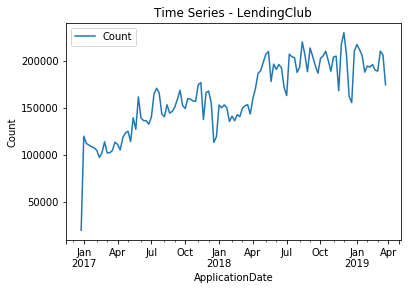

In [18]:
dfIndex.plot()
plt.title('Time Series - LendingClub')
plt.xlabel('ApplicationDate')
plt.ylabel('Count')
plt.show()

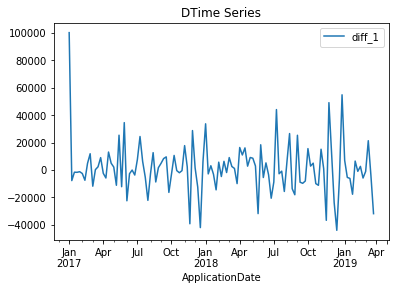

In [19]:
dfIndex['diff_1'] = dfIndex.Count - dfIndex.Count.shift()
dfIndex.plot(y='diff_1')
plt.title('DTime Series')
plt.show()

Text(0.5, 1.0, 'Unrate PACF')

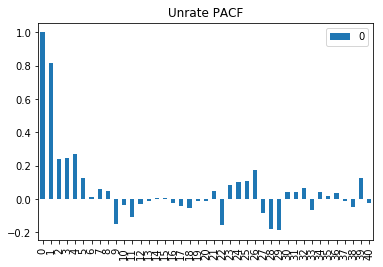

In [21]:
from statsmodels.tsa.stattools import pacf
x_acf = pd.DataFrame(pacf(dfIndex.Count))
x_acf.plot(kind='bar')
plt.title("Unrate PACF")

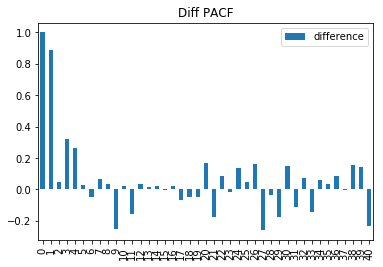

In [22]:
x_acf = pd.DataFrame(pacf(dfIndex.Count.iloc[1:]))
x_acf.plot(kind='bar')
plt.title("Diff PACF")
plt.legend(['difference'])

Run Dickey-Fuller test on raw and differenced data to confirm stationary. Null Hypothesis assumes non-stationarity.

From this test, we see the time series is not stationary because the p-value is > 0.05

In [24]:
from statsmodels.tsa.stattools import adfuller

# raw data
acdf_test = adfuller(dfIndex['Count'], autolag='AIC')
df_output = pd.Series(acdf_test[0:4], index=[
                      'Test Statistic', 'p-value', '#lags used', '#nobs used'])
print('raw data\n', df_output)
for k, v in acdf_test[4].items():
    print(k, v)

raw data
 Test Statistic     -1.823255
p-value             0.368979
#lags used          3.000000
#nobs used        114.000000
dtype: float64
1% -3.489057523907491
5% -2.887246327182993
10% -2.5804808802708528


In [29]:
from pmdarima import auto_arima
model = auto_arima(dfIndex['Count'], start_p=1, start_q=1,
                   max_p=3, max_q=3, m=13,
                   start_P=0, seasonal=True,
                   d=None, D=1, trace=True,
                   error_action='ignore',   # we don't want to know if an order does not work
                   suppress_warnings=True,  # we don't want convergence warnings
                   stepwise=True)           # set to stepwise
model.summary()

AttributeError: type object 'pmdarima.arima._arima.array' has no attribute '__reduce_cython__'

## Building models.

So our both time series has 1 strong autocorrelation. Let's build some ARIMA models to experiment and see how we do!

We're going to build a series of models to evaluate, each with slightly different parameters for the ARIMA. Note that the parameteres are passed in (p, d, q) order, corresponding to the AR, I, and MA portions respectively.

Recall how we interpret those attributes. The AR is the past values, I is the level of differencing, and MA is adjusting to past errors.

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
def model_time_series(p,d,q):
    model = ARIMA(df.Count, order=(p,d,q))
    model_fit = model.fit()
    print(model_fit.summary())
    print('Residuals Description')
    print(model_fit.resid.describe())

In [ ]:
model_time_series(1,0,0)

In [ ]:
model_time_series(0,1,0)

In [ ]:
model_time_series(0,0,1)

In [ ]:
model_time_series(1,1,0)

In [ ]:
model_time_series(0,1,1)

In [ ]:
model_time_series(1,1,1)

In [ ]:
model_time_series(2,1,2)

In [ ]:
model_time_series(3,1,3)

In [ ]:
model_111 = ARIMA(df.INDPRO, order=(1,1,1))
model_111_fit = model_111.fit()
print(model_111_fit.summary())
print('Residuals Description')
print(model_111_fit.resid.describe())

In [ ]:
residuals = pd.DataFrame(model_111_fit.resid)

residuals.plot(legend=False)
plt.title('Time Series of Residuals')

residuals.hist(bins=20)
plt.title('Histogram of Residuals')